In [22]:
# Import the required libraries here

import pandas as pd
import ISLP
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

- days_until_flight	
- days_since_last_search	
- fare_change	
- seats_change	
- weighted_fare_change	
- weighted_seats_change	
- is_search_weekend	
- is_flight_weekend	
- Multiple_Carriers	
- distinct_airlines	
- combination_code	
- journeyStartTime
- isRefundable	
- isNonStop	
- baseFare	
- totalFare	
- seatsRemaining	
- totalTravelDistance
- destinationAirport

In [11]:
df = pd.read_pickle('processed.pkl')
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'days_until_flight',
       'days_since_last_search', 'fare_change', 'seats_change',
       'weighted_fare_change', 'weighted_seats_change', 'is_search_weekend',
       'is_flight_weekend', 'Multiple_Carriers', 'distinct_airlines',
       'combination_code', 'journeyStartTime'],
      dtype='object')

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

legId                                0
searchDate                           0
flightDate                           0
startingAirport                      0
destinationAirport                   0
fareBasisCode                        0
travelDuration                       0
elapsedDays                          0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
baseFare                             0
totalFare                            0
seatsRemaining                       0
totalTravelDistance                  0
segmentsDepartureTimeEpochSeconds    0
segmentsDepartureTimeRaw             0
segmentsArrivalTimeEpochSeconds      0
segmentsArrivalTimeRaw               0
segmentsArrivalAirportCode           0
segmentsDepartureAirportCode         0
segmentsAirlineName                  0
segmentsAirlineCode                  0
segmentsEquipmentDescription         0
segmentsDurationInSeconds            0
segmentsDistance         

In [15]:
# Load your data
df = pd.read_pickle('processed.pkl')

# Define the relevant features
relevant_features = [
    'days_until_flight',
    'days_since_last_search',
    'fare_change',
    'seats_change',
    'weighted_fare_change',
    'weighted_seats_change',
    'is_search_weekend',
    'is_flight_weekend',
    'Multiple_Carriers',
    'combination_code',
    'journeyStartTime'
]

In [16]:
# Prepare the feature matrix X and target vector y using only the relevant features
X = df[relevant_features]
y = df['totalFare']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
while len(X_train.columns) > 1:
    # Add a constant to the model (intercept) in both training and test sets
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit the model
    model = sm.OLS(y_train, X_train_const).fit()

    # Predict and calculate metrics using the test set with constant
    predictions = model.predict(X_test_const)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Identify the feature with the highest p-value (least significant) and remove it
    p_values = model.pvalues.iloc[1:]  # exclude the constant when considering p-values
    highest_p_value_feature = p_values.idxmax()

    # Print current model's summary and metrics, and which feature is being eliminated
    print(f"Eliminating feature: {highest_p_value_feature}")
    print("Model Summary with Features:", X_train.columns.tolist())
    print(model.summary())
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R2 Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("-" * 80)

    # Drop the feature with the highest p-value
    X_train = X_train.drop(columns=highest_p_value_feature)
    X_test = X_test.drop(columns=highest_p_value_feature)

Eliminating feature: is_search_weekend
Model Summary with Features: ['const', 'days_until_flight', 'days_since_last_search', 'fare_change', 'seats_change', 'weighted_fare_change', 'weighted_seats_change', 'is_search_weekend', 'is_flight_weekend', 'Multiple_Carriers', 'combination_code', 'journeyStartTime']
                            OLS Regression Results                            
Dep. Variable:              totalFare   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                 2.643e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:03:23   Log-Likelihood:            -3.1026e+07
No. Observations:             4565185   AIC:                         6.205e+07
Df Residuals:                 4565173   BIC:                         6.205e+07
Df Model:                          11                       

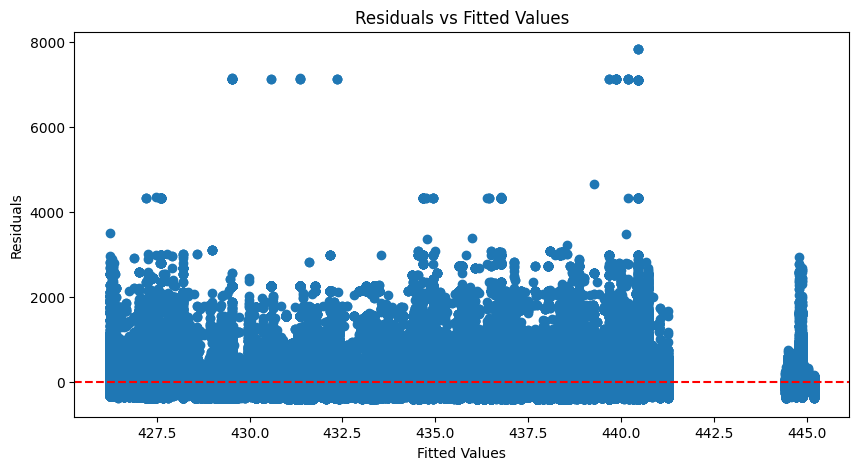

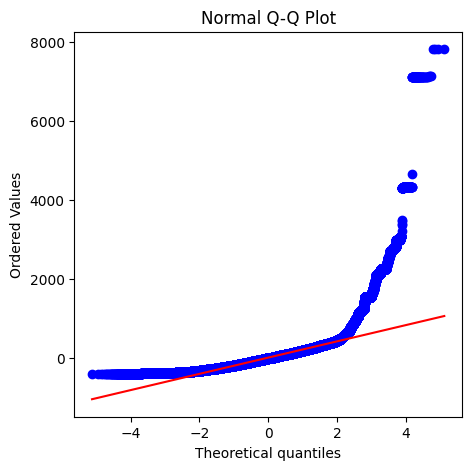

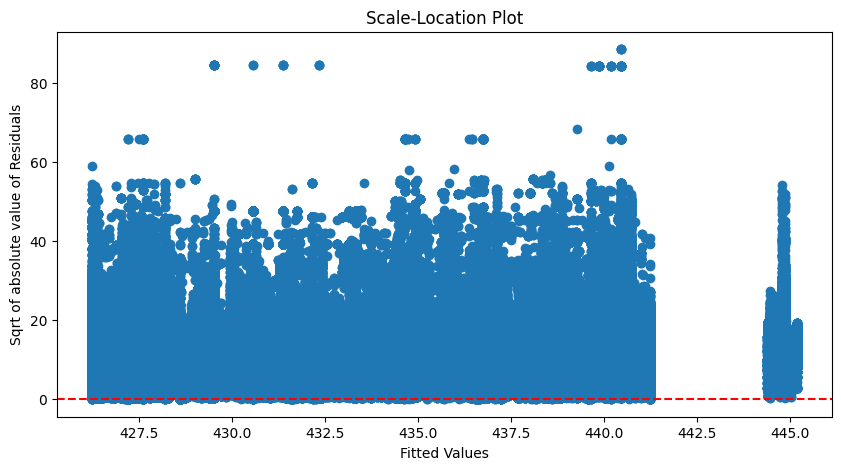

Durbin-Watson statistic: 1.998301612555213


In [19]:
# Assuming 'model' is the fitted OLS model from statsmodels
residuals = model.resid
fitted_values = model.fittedvalues

# 1. Residuals vs Fitted Values Plot for Homoscedasticity and Linearity
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# 2. Q-Q Plot for Normality of Residuals
plt.figure(figsize=(5, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location Plot for Homoscedasticity
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, np.sqrt(np.abs(residuals)))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt of absolute value of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# 4. Durbin-Watson Statistic
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')


- Heteroscedasticity: The variance of residuals increases with fitted values, suggesting that a transformation of the response variable or the use of weighted regression might be necessary.
- Non-linearity: The presence of patterns in the residuals suggests that the relationship between predictors and response may be non-linear. Non-linear transformations of the predictors or the response might improve the model.
- Non-normality of Residuals: The residuals do not follow a normal distribution, especially for large values. This could affect the reliability of confidence intervals and hypothesis tests.

In [20]:
# Apply log transformation to the response variable y
y_log = np.log(y)

# Split the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Ensure to handle cases where y_test might be zero or negative before log transformation
y_test_log = np.log(y_test[y_test > 0])

In [21]:
# Iterative process of fitting the model and removing features
while len(X_train.columns) > 1:
    # Add a constant to the model (intercept)
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit the model using the log-transformed y
    model = sm.OLS(y_train_log, X_train_const).fit()

    # Predict on the test set and transform predictions back to original scale
    predictions_log = model.predict(X_test_const)
    predictions = np.exp(predictions_log)  # Inverse of log is exp

    # Calculate metrics on the original scale
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Identify the feature with the highest p-value (least significant) and remove it
    p_values = model.pvalues.iloc[1:]  # exclude the constant when considering p-values
    highest_p_value_feature = p_values.idxmax()

    # Print the model's summary, the eliminated feature, and performance metrics
    print(f"Eliminating feature: {highest_p_value_feature}")
    print("Model Summary with Features:", X_train.columns.tolist())
    print(model.summary())
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R2 Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("-" * 80)

    # Drop the feature with the highest p-value from both training and testing sets
    X_train = X_train.drop(columns=highest_p_value_feature)
    X_test = X_test.drop(columns=highest_p_value_feature)

Eliminating feature: is_search_weekend
Model Summary with Features: ['const', 'days_until_flight', 'days_since_last_search', 'fare_change', 'seats_change', 'weighted_fare_change', 'weighted_seats_change', 'is_search_weekend', 'is_flight_weekend', 'Multiple_Carriers', 'combination_code', 'journeyStartTime']
                            OLS Regression Results                            
Dep. Variable:              totalFare   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                 3.097e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:18:16   Log-Likelihood:            -3.4028e+06
No. Observations:             4565185   AIC:                         6.806e+06
Df Residuals:                 4565173   BIC:                         6.806e+06
Df Model:                          11                       

In [23]:
# Prepare the feature matrix X and target vector y using only the relevant features
X = df[relevant_features]
y = df['totalFare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Standardize the features (mean of 0 and variance of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression with built-in cross-validation to find the optimal alpha
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train_scaled, y_train)
predictions_ridge = ridge.predict(X_test_scaled)

# Lasso regression with built-in cross-validation to find the optimal alpha
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=10000)
lasso.fit(X_train_scaled, y_train)
predictions_lasso = lasso.predict(X_test_scaled)

# Print metrics for Ridge Regression
print(f'Ridge Regression Metrics:')
print(f'R2 Score: {r2_score(y_test, predictions_ridge)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, predictions_ridge)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions_ridge)}')
print('-' * 40)

# Print metrics for Lasso Regression
print(f'Lasso Regression Metrics:')
print(f'R2 Score: {r2_score(y_test, predictions_lasso)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, predictions_lasso)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions_lasso)}')


Ridge Regression Metrics:
R2 Score: 0.06200183768215717
Mean Squared Error (MSE): 46910.12696264405
Mean Absolute Error (MAE): 150.5703245488523
----------------------------------------
Lasso Regression Metrics:
R2 Score: 0.06200187791074807
Mean Squared Error (MSE): 46910.12495077624
Mean Absolute Error (MAE): 150.5703168758596
